# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhijinzhai/loandata")

print("Path to dataset files:", path)

100%|██████████| 5.48k/5.48k [00:00<00:00, 6.81MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zhijinzhai/loandata/versions/1


In [56]:
import os
os.listdir(path)

['Loan payments data.csv']

In [63]:
df = pd.read_csv(os.path.join(path, "Loan payments data.csv"))
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [64]:
df.shape

(500, 11)

In [65]:
df.isna().sum()

,0
Loan_ID,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
paid_off_time,100
past_due_days,300
age,0
education,0


In [66]:
df.duplicated()[df.duplicated()==True]

,0


In [71]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,2016-10-07,2016-09-14 19:31:00,NaT,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,2016-10-07,2016-10-07 09:00:00,NaT,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,2016-10-07,2016-09-25 16:58:00,NaT,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,2016-09-22,2016-09-22 20:00:00,NaT,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,2016-10-08,2016-09-23 21:36:00,NaT,28,college,female


### Descriptive summary Statistics

In [70]:
# Statistical summary
df.describe(include='all')

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200,500.000000,500,500
unique,500,3,NaN,NaN,7,NaN,NaN,NaN,NaN,4,2
top,xqd20160500,PAIDOFF,NaN,NaN,9/11/2016,NaN,NaN,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,NaN,NaN,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,2016-10-05 08:18:14.400000256,2016-10-05 20:51:58.349999872,1970-01-01 00:00:00.000000036,31.116000,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,2016-09-15 00:00:00,2016-09-09 13:45:00,1970-01-01 00:00:00.000000001,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,2016-09-25 00:00:00,2016-09-25 11:57:15,1970-01-01 00:00:00.000000003,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,2016-10-10 00:00:00,2016-10-05 21:19:00,1970-01-01 00:00:00.000000037,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,2016-10-11 00:00:00,2016-10-11 16:00:00,1970-01-01 00:00:00.000000060,35.000000,NaN,NaN
max,NaN,NaN,1000.000000,30.000000,NaN,2016-11-12 00:00:00,2016-12-02 09:45:00,1970-01-01 00:00:00.000000076,51.000000,NaN,NaN


### Univariate Analysis

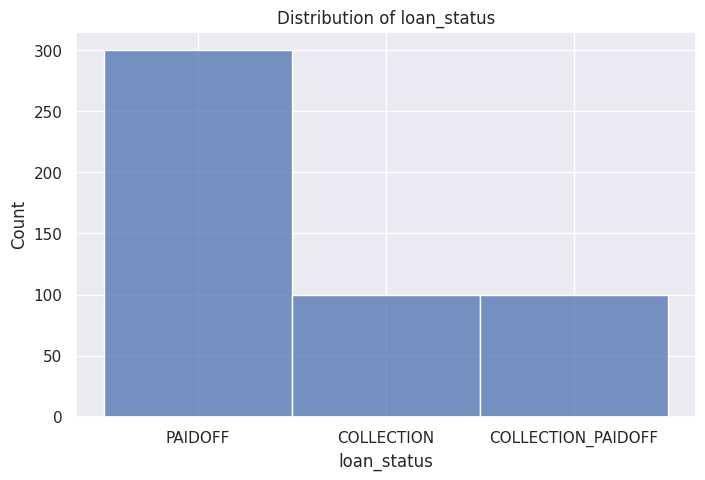

In [75]:
def univariate_analysis(column):
  plt.figure(figsize=(8,5))
  sns.histplot(df[column], bins=20)
  plt.title(f"Distribution of {column}")
  plt.show()

univariate_analysis('loan_status')

- Shows that we have more paidoff loans then others.

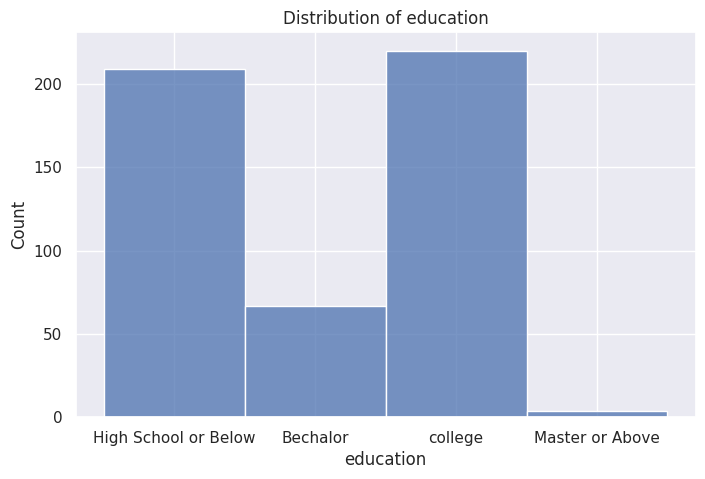

In [79]:
univariate_analysis('education')

- We notice that master's and phd don't apply for loans, probabily cuz they're rich lol

## Bivariate Analysis

### Revenue by Country

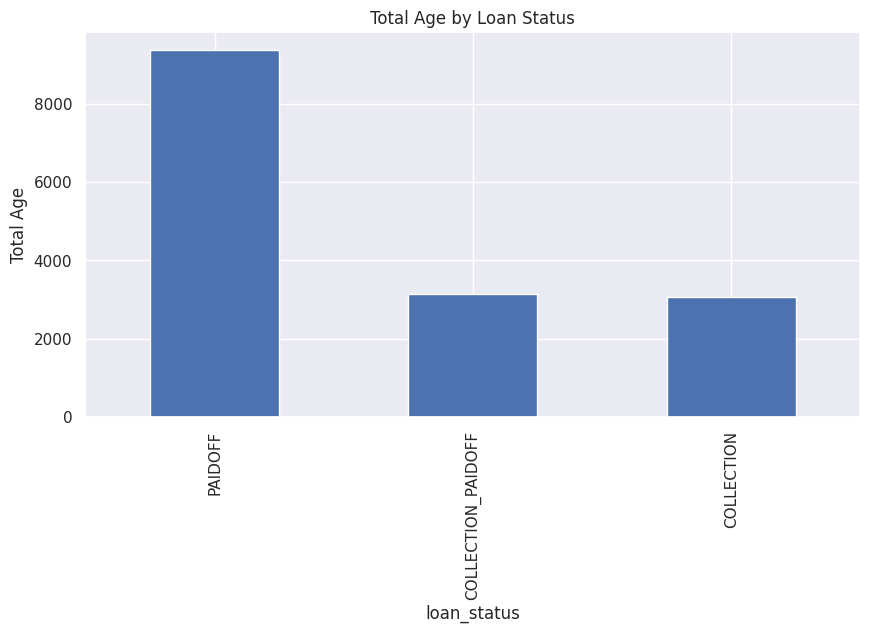

,age
loan_status,
PAIDOFF,9363
COLLECTION_PAIDOFF,3134
COLLECTION,3061


In [90]:
loan_status_age = df.groupby('loan_status')['age'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
loan_status_age.plot(kind='bar')
plt.title("Total Age by Loan Status")
plt.ylabel("Total Age")
plt.show()

loan_status_age

### Revenue by Product

### Loan Status vs Principal Amount

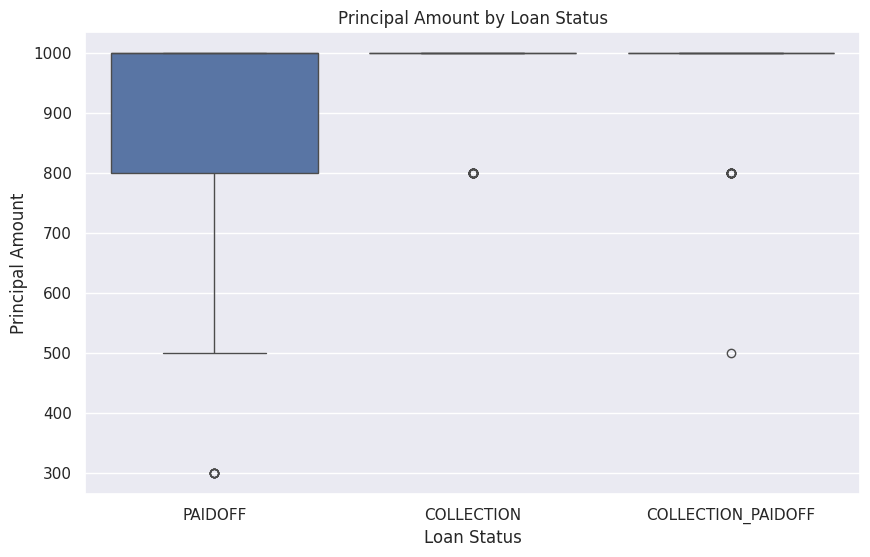

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='Principal', data=df)
plt.title('Principal Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Principal Amount')
plt.show()

### Loan Status vs Education

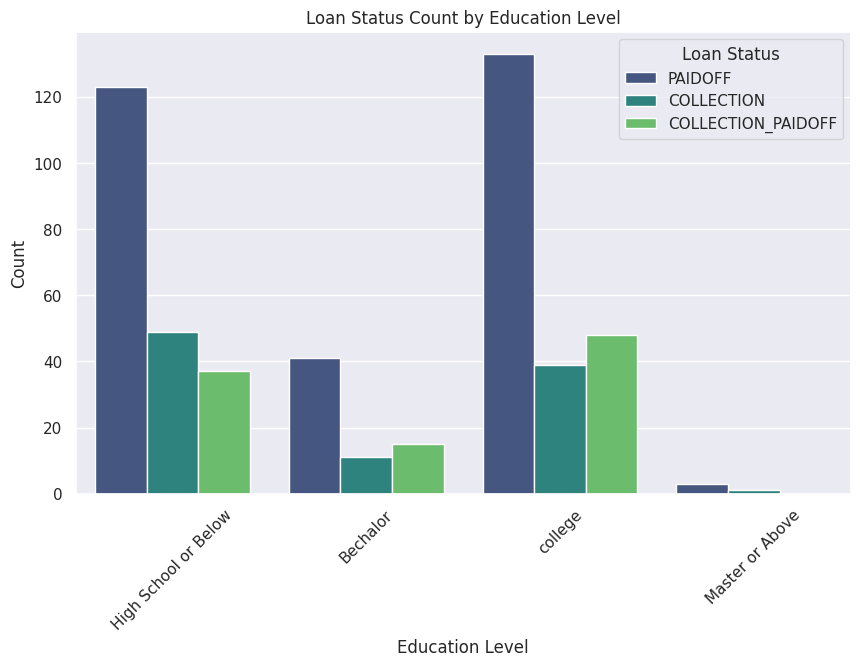

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

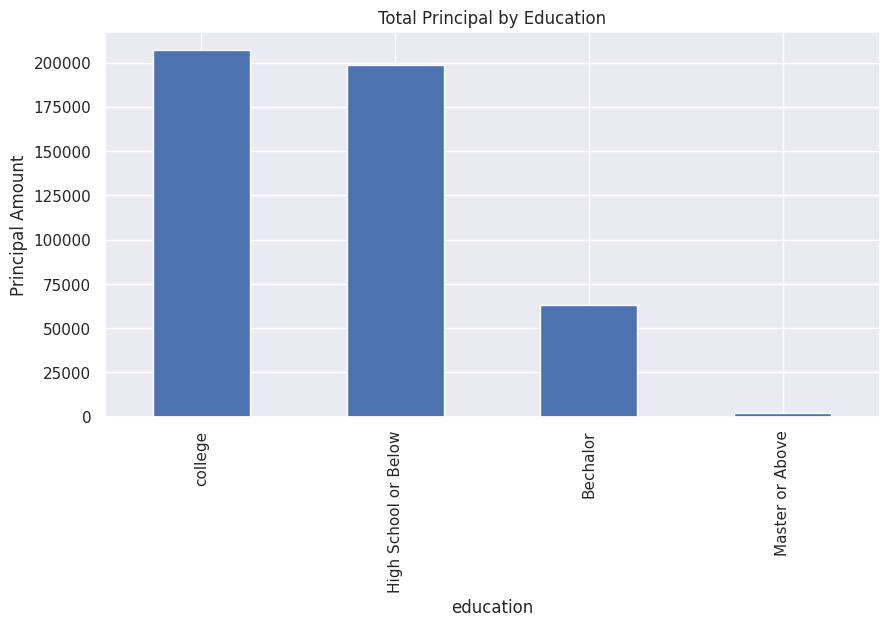

,Principal
education,
college,207100
High School or Below,198800
Bechalor,63300
Master or Above,2400


In [93]:
education_principal = df.groupby('education')['Principal'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
education_principal.plot(kind='bar')
plt.title("Total Principal by Education")
plt.ylabel("Principal Amount")
plt.show()

education_principal

### Revenue by Sales Person

### Boxes vs Revenue Relationship

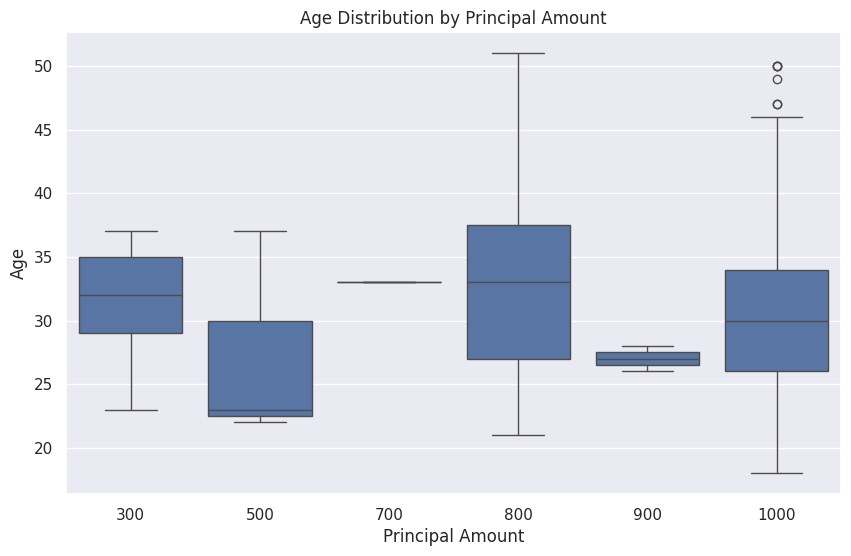

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Principal', y='age', data=df)
plt.title("Age Distribution by Principal Amount")
plt.xlabel("Principal Amount")
plt.ylabel("Age")
plt.show()

### Age vs. Loan Terms Scatter Plot

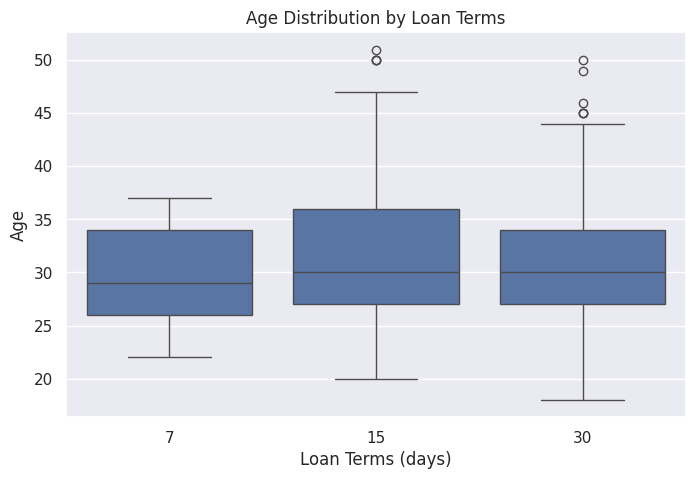

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(x='terms', y='age', data=df)
plt.title('Age Distribution by Loan Terms')
plt.xlabel('Loan Terms (days)')
plt.ylabel('Age')
plt.show()

### Correlation Matrix: Principal, Terms, and Age

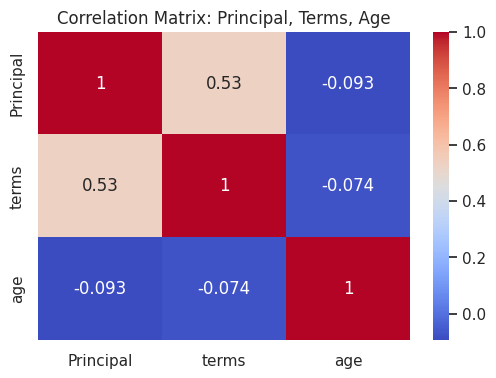

In [103]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Principal', 'terms', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Principal, Terms, Age')
plt.show()

### Correlation Matrix

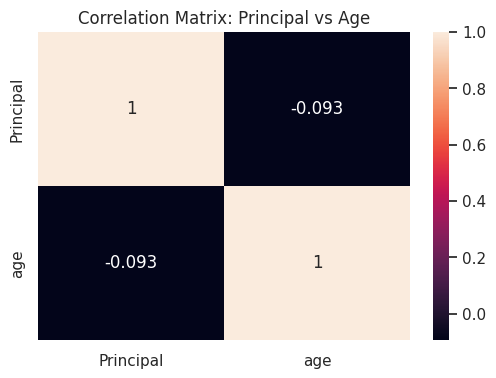

In [104]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Principal', 'age']].corr(), annot=True)
plt.title("Correlation Matrix: Principal vs Age")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship